<a href="https://colab.research.google.com/github/sid2610/HPE_Goal/blob/main/BallTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import pickle

TensorFlow 1.x selected.


In [ ]:
%pip install azure-storage-blob

     |████████████████████████████████| 348kB 5.5MB/s 
     |████████████████████████████████| 3.2MB 13.8MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 133kB 42.2MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 


In [ ]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

try:
    print("Azure Blob storage v" + __version__ + " - Python quickstart sample")
    # Quick start code goes here
except Exception as ex:
    print('Exception:')
    print(ex)

Azure Blob storage v12.7.1 - Python quickstart sample


In [ ]:
os.mkdir("./videos")

In [ ]:
os.mkdir("./annots")

In [48]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "videos"

In [49]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [50]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [51]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".mp4"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./videos/Cam-" + str(i+1) + ".mp4"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [ ]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "annots"

In [ ]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [ ]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [ ]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".csv"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./annots/Cam-" + str(i+1) + ".csv"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [ ]:
import matplotlib.pyplot as plt
import imageio
import imutils
import pandas as pd
import cv2
import random

In [ ]:
cam = pd.DataFrame()
for i in range(4):
    d = pd.read_csv('./annots/Cam-' + str(i+1) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    d = d.drop(2)
    cam = pd.concat([cam,d])
for i in range(2):
    d = pd.read_csv('./annots/Cam-' + str(i+5) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    cam = pd.concat([cam,d])

In [ ]:
cam = cam.reset_index()

In [ ]:
cam

,index,Frame No.,x,y
0,3,4,-,-
1,4,5,-,-
2,5,6,-,-
3,6,7,-,-
4,7,8,-,-
...,...,...,...,...
17979,2995,2996,-,-
17980,2996,2997,-,-
17981,2997,2998,-,-
17982,2998,2999,-,-


In [ ]:
cam = cam.rename(columns={"Frame No.":"f"," x":"x"," y":"y"})

In [ ]:
for i in range(17984):
    if cam.x[i]==' -':
        cam.x[i] = -1
        cam.y[i] = -1
    cam.x[i] = int(cam.x[i])
    cam.y[i] = int(cam.y[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
vid = imageio.get_reader('./videos/Cam-1.mp4')
i = 120
frame = vid.get_data(i)
clone = frame.copy()
x = cam.x[i]
y = cam.y[i]
cv2.rectangle(clone, (x-50,y-50), (x+50,y+50), (0,0,255), 2)
plt.figure(figsize=(20,20))
plt.imshow(clone)

FileNotFoundError: ignored

In [ ]:
i = 0
while cam.x[i] == -1:
    i += 1
i

116

In [47]:
def extract_frame(frame, x, y, h, w):
    hh = int(h/2)
    ww = int(w/2)
    if x>=ww and x<(frame.shape[1]-ww):
        lx = ww
    elif x<ww:
        lx = x
    else:
        lx = w-(frame.shape[1]-x)
    if y>=hh and y<(frame.shape[0]-hh):
        ly = hh
    elif y<hh:
        ly = y
    else:
        ly = h-(frame.shape[0]-y)
    return frame[y-ly:y+h-ly, x-lx:x+w-lx]

In [ ]:
import pickle

In [23]:
with open ('/content/drive/MyDrive/Datasets/ISSIA/data/tx', 'rb') as fp:
    tx = pickle.load(fp)
with open ('/content/drive/MyDrive/Datasets/ISSIA/data/ty', 'rb') as fp:
    ty = pickle.load(fp)

In [24]:
len(tx)

10162

In [ ]:
n = 5
m = 12
for i in range(12000, 17983):
    if i%100 == 0:
        print(i, len(tx))
    if cam.x[i] != -1:
        vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
        frame = vid.get_data(m)
        tx.append(extract_frame(frame, cam.x[i], cam.y[i]))
        ty.append(1)
        rx = random.randrange(0,1920)
        ry = random.randrange(0,1080)
        tx.append(extract_frame(frame, rx, ry))
        ty.append(0)
    m+=1
    if cam.f[i]>cam.f[i+1]:
        n += 1
        m = 0
i += 1
if cam.x[i] != -1:
    vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
    frame = vid.get_data(m)
print(i)

12000 9016
12100 9016
12200 9016
12300 9016
12400 9016
12500 9184
12600 9380
12700 9414
12800 9414
12900 9414
13000 9414
13100 9414
13200 9414
13300 9414
13400 9414
13500 9414
13600 9414
13700 9414
13800 9414
13900 9414
14000 9414
14100 9414
14200 9414
14300 9414
14400 9414
14500 9546
14600 9626
14700 9626
14800 9626
14900 9626
15000 9648
15100 9648
15200 9648
15300 9648
15400 9648
15500 9838
15600 10038
15700 10086
15800 10086
15900 10086
16000 10086
16100 10086
16200 10086
16300 10086
16400 10086
16500 10086
16600 10086
16700 10086
16800 10086
16900 10086
17000 10086
17100 10086
17200 10086
17300 10086
17400 10086
17500 10162
17600 10162
17700 10162
17800 10162
17900 10162
17983


In [ ]:
len(tx)

10162

In [ ]:
os.mkdir('./data_1')

In [ ]:
with open('./data_1/tx', 'wb') as fp:
    pickle.dump(tx,fp)

In [ ]:
with open('./data_1/ty', 'wb') as fp:
    pickle.dump(ty,fp)

In [ ]:
import shutil

In [ ]:
shutil.make_archive('data_1', 'zip', './data_1')

'/content/data_1.zip'

In [ ]:
with open ('./data/tx', 'rb') as fp:
    tx = pickle.load(fp)
with open ('./data/ty', 'rb') as fp:
    ty = pickle.load(fp)

In [ ]:
len(ty)

18624

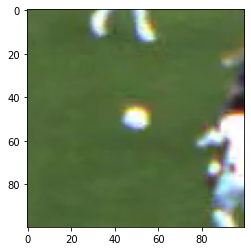

In [30]:
plt.imshow(tx[3600])

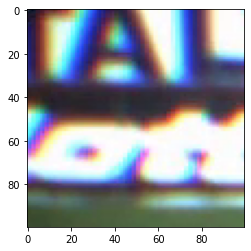

In [52]:
vid = imageio.get_reader('./videos/Cam-1.mp4')
frame = vid.get_data(115)
frame
plt.imshow(extract_frame(frame, cam.x[115], cam.y[115], 100, 100))

In [59]:
trainx = np.asarray(tx)
trainy = np.asarray(ty)

In [60]:
trainx.shape

(10162, 100, 100, 3)

In [61]:
trainy.shape

(10162,)

In [62]:
trainy = np.expand_dims(trainy, axis=1)

In [63]:
trainy.shape

(10162, 1)

In [64]:
from scipy.ndimage.filters import gaussian_filter

blur = gaussian_filter(trainx[0], sigma=0.9)

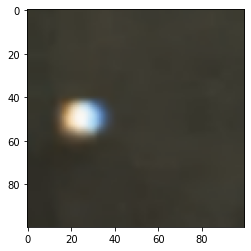

In [65]:
plt.imshow(blur)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

In [68]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(100,100,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step


In [69]:
model = Sequential()

In [70]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
trainx_1 = vgg.predict(trainx)

In [72]:
trainx_1.shape

(10162, 3, 3, 512)

In [73]:
(x_train, x_val, y_train, y_val) = train_test_split(trainx_1, trainy, test_size = 0.3)

In [75]:
x_train.shape

(7113, 3, 3, 512)

In [76]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7113 samples, validate on 3049 samples
Epoch 1/10
7113/7113 [==============================] - 13s 2ms/sample - loss: 0.5538 - acc: 0.9201 - val_loss: 0.1232 - val_acc: 0.9498
Epoch 2/10
7113/7113 [==============================] - 12s 2ms/sample - loss: 0.1716 - acc: 0.9556 - val_loss: 0.1888 - val_acc: 0.9403
Epoch 3/10
7113/7113 [==============================] - 13s 2ms/sample - loss: 0.1148 - acc: 0.9679 - val_loss: 0.1074 - val_acc: 0.9659
Epoch 4/10
7113/7113 [==============================] - 13s 2ms/sample - loss: 0.0946 - acc: 0.9733 - val_loss: 0.1571 - val_acc: 0.9626
Epoch 5/10
7113/7113 [==============================] - 13s 2ms/sample - loss: 0.1103 - acc: 0.9788 - val_loss: 0.2116 - val_acc: 0.9639
Epoch 6/10
7113/7113 [==============================] - 13s 2ms/sample - loss: 0.0761 - acc: 0.9847 - val_loss: 0.2347 - val_acc: 0.9600
Epoch 7/10
7113/7113 [==============

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4719616   
_________________________________________________________________
dense_1 (Dense)              multiple                  131200    
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 4,852,897
Trainable params: 4,852,897
Non-trainable params: 0
_________________________________________________________________


In [79]:
def sliding_window(img, win, step):
    for y in range(0,img.shape[0]-win[1],step):
        for x in range(0,img.shape[1]-win[0],step):
            yield (x,y,img[y:y+win[1],x:x+win[0]])

In [80]:
def pyramid(img, scale, minsize):
    yield img
    print(img.shape)
    while True:
        w = int(img.shape[1]/scale)
        img = imutils.resize(img, width=w)
        if img.shape[0]<minsize[1] or img.shape[1]<minsize[0]:
            break
        yield img
        print(img.shape)

In [134]:
win_size = (100,100)
step = 20

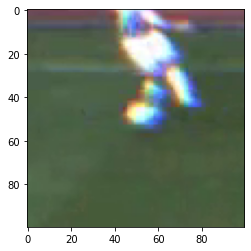

In [83]:
plt.imshow(x_test[0])

In [84]:
y_test[0]

array([1])

In [88]:
t = vgg.predict(x_test)

In [89]:
t.shape

(2033, 3, 3, 512)

In [90]:
y_t = model.predict(t)

In [94]:
np.average(np.absolute(y_test-y_t))

0.012189146719480815

In [135]:
test = plt.imread('sample.png')

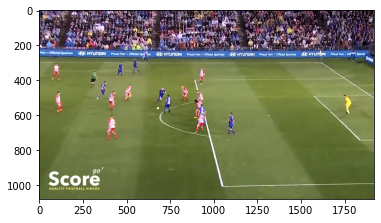

In [136]:
plt.imshow(test)

In [137]:
test.shape

(1080, 1920, 3)

In [138]:
frame_1 = frame.astype(np.float)/255
for y in range(test.shape[0]):
    for x in range(test.shape[1]):
        if (test[y][x][1]<(np.max([test[y][x][0],test[y][x][2]]))):
            frame_1[y][x] *= 0

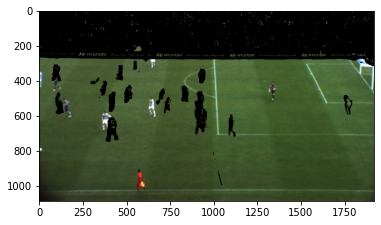

In [139]:
plt.imshow(frame_1)

In [140]:
v = 0
for i in range(frame_1.shape[0]):
    if (np.sum(frame_1[i,:,1])/frame_1.shape[1])>0.2:
        v = i
        break

In [141]:
test = test[v:]

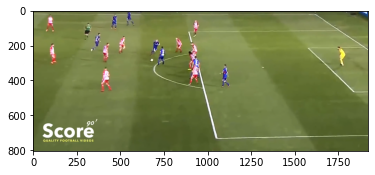

In [142]:
plt.imshow(test)

In [143]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 20
0 40
0 60
0 80
0 100
0 120
0 140
0 160
0 180
0 200
0 220
0 240
0 260
0 280
0 300
0 320
0 340
0 360
0 380
0 400
0 420
0 440
0 460
0 480
0 500
0 520
0 540
0 560
0 580
0 600
0 620
0 640
0 660
0 680
0 700


In [144]:
np.max(preds)

0.98043126

In [145]:
len(locs)

3276

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


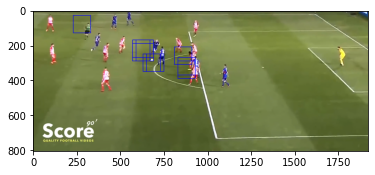

In [152]:
clone = test.copy()
for i in range(len(preds)):
    if preds[i]>0.9:
        cv2.rectangle(clone, (locs[i][0]-50,locs[i][1]-50), (locs[i][0]+50,locs[i][1]+50), (0,0,255), 2)
plt.imshow(clone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


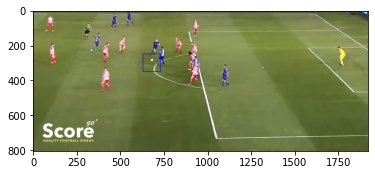

In [153]:
clone = test.copy()
i = np.argmax(preds)
cv2.rectangle(clone, (locs[i][0]-50,locs[i][1]-50), (locs[i][0]+50,locs[i][1]+50), (0,0,255), 2)
plt.imshow(clone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


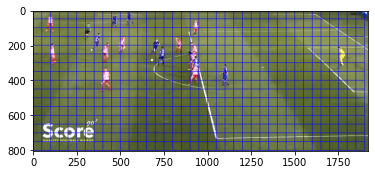

In [110]:
clone = test.copy()
for i in range(len(preds)):
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

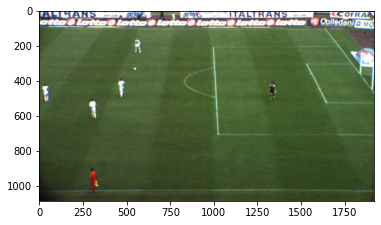

In [129]:
test = vid.get_data(250)
plt.imshow(test)

In [130]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 50
0 100
0 150
0 200
0 250
0 300
0 350
0 400
0 450
0 500
0 550
0 600
0 650
0 700
0 750
0 800
0 850
0 900
0 950


In [131]:
np.argmax(preds)

32

In [133]:
preds[32]

array([[1.]], dtype=float32)

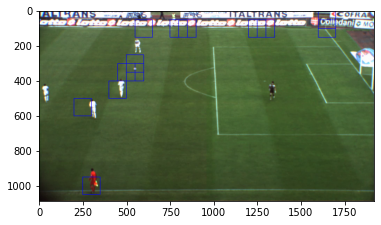

In [132]:
clone = test.copy()
for i in range(len(preds)):
    if preds[i]>0.99:
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

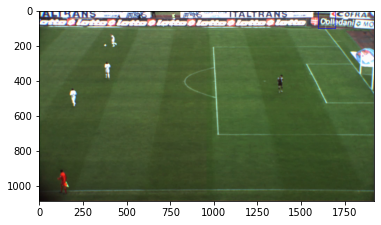

In [115]:
clone = test.copy()
i = np.argmax(preds)
cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

In [116]:
frame_1 = test.astype(np.float)/255
for y in range(test.shape[0]):
    for x in range(test.shape[1]):
        if (test[y][x][1]<(np.max([test[y][x][0],test[y][x][2]]))):
            frame_1[y][x] *= 0

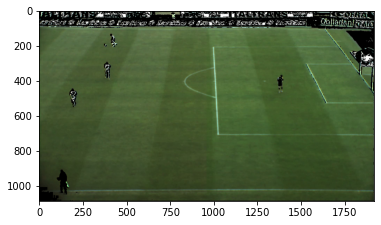

In [118]:
plt.imshow(frame_1)

In [125]:
v = 0
for i in range(frame_1.shape[0]):
    if (np.sum(frame_1[i,:,1])/frame_1.shape[1])>0.2:
        v = i
        break

In [126]:
test = test[v:]

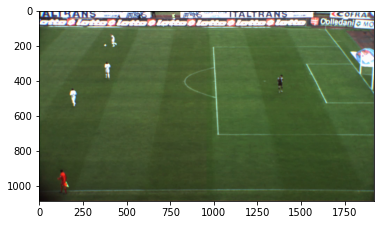

In [127]:
plt.imshow(test)